In [53]:
#https://bhishm9135.medium.com/nlp-beginners-guide-to-featurize-story-based-text-mpst-movie-plot-synopses-tags-5692ff426ea6


# Stanza documentation
# https://stanfordnlp.github.io/stanza/lemma.html

In [1]:
import nltk
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('')
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import SnowballStemmer

In [2]:
# https://www.samueltaylor.org/articles/feature-importance-for-any-model.html
# https://medium.com/@zafaralibagh6/a-simple-word2vec-tutorial-61e64e38a6a1
import pandas as pd
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from textblob import TextBlob
import string
import gensim.downloader as api
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
from sentic import SenticPhrase
import sentic
import senticnet

#### Data load

In [4]:
df = pd.read_csv("train.csv",sep = ',')

In [130]:
t = df['text']

0    TENNESSEE: We're the best state. Nobody even c...
1    A man inserted an advertisement in the classif...
2    How many men does it take to open a can of bee...
3    Told my mom I hit 1200 Twitter followers. She ...
4    Roses are dead. Love is fake. Weddings are bas...
5    'Trabajo,' the Spanish word for work, comes fr...
6    I enrolled on some skill training and extra cu...
7    ME: I'm such an original. Truly one of a kind....
8    Men who ejaculated 21 times or more a month ha...
9    I got REALLY angry today and it wasn't about n...
Name: text, dtype: object

#####  Preprocesamiento

In [87]:
import stanza
#stanza.download(lang='en', processors='tokenize')
#nlp = stanza.Pipeline(lang='en', processors={'tokenize': 'spacy'})
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos, mwt,lemma', tokenize_no_ssplit=True)

2022-03-01 17:26:46 WARNING: Can not find mwt: default from official model list. Ignoring it.
2022-03-01 17:26:46 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |

2022-03-01 17:26:46 INFO: Use device: cpu
2022-03-01 17:26:46 INFO: Loading: tokenize
2022-03-01 17:26:46 INFO: Loading: pos
2022-03-01 17:26:46 INFO: Loading: lemma
2022-03-01 17:26:46 INFO: Done loading processors!


In [148]:
def preprocesado(texto):
    
    for i in range(len(texto)):
        total = []
        token = nlp(texto[i])
        texto_tokenizado_lematizado = []
        
        for i, sentence in enumerate(token.sentences):
            punctuation = string.punctuation
            lemmas = [(word.lemma).lower() for word in sentence.words]
            lemmas = ' '.join(lemmas)
            
            for p in punctuation:
                word = lemmas.replace(p, " ")
                stripped = word.split()
            words = [word for word in stripped if word.isalpha()]
            words = ' '.join(words)
            
            total.append(words)
            #data['texto_limpio'] = total
            #print(total)
        #print(total)
    
    
        #return words        
            yield words

In [149]:
preprocesado_texto = preprocesado(t)

In [150]:
texto_limpio = []
for i in preprocesado_texto:
    texto_limpio.append(i)
df['texto_limpio'] = texto_limpio
df.head()

,id,text,is_humor,humor_rating,humor_controversy,offense_rating,texto_limpio
0,1,TENNESSEE: We're the best state. Nobody even c...,1,2.42,1.0,0.2,tennessee we be the good state nobody even com...
1,2,A man inserted an advertisement in the classif...,1,2.50,1.0,1.1,a man insert a advertisement in the classified...
2,3,How many men does it take to open a can of bee...,1,1.95,0.0,2.4,how many man do it take to open a can of beer ...
3,4,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,1.0,0.0,tell my mom i hit twitter follower she point o...
4,5,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.0,0.1,rose be dead love be fake wedding be basically...


###### Exploratory analysis

<AxesSubplot:xlabel='count', ylabel='is_humor'>

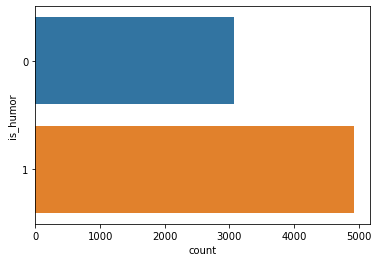

In [14]:
#sns.countplot(data=df, y="is_humor")
sns.countplot(data =df, y="is_humor")

<AxesSubplot:xlabel='count', ylabel='humor_controversy'>

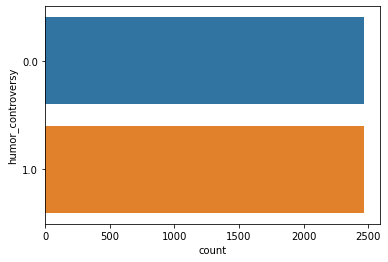

In [15]:
sns.countplot(data =df, y="humor_controversy")

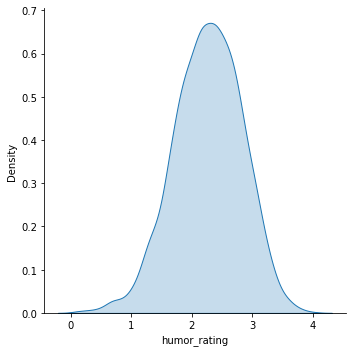

In [19]:
sns.displot(df, x="humor_rating",kind="kde",fill=True)

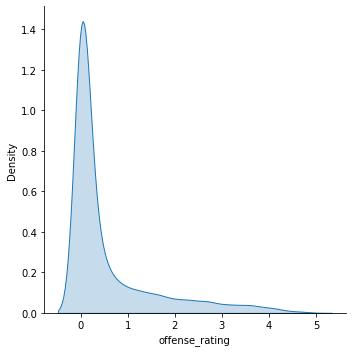

In [18]:
sns.displot(df, x="offense_rating",kind="kde",fill=True)

In [152]:
import os
directory = os.getcwd() 
print(directory)

/Users/luciainesmerlo/Desktop/TFG/HaHackaton2020


In [153]:
df.to_csv('/Users/luciainesmerlo/Desktop/TFG/HaHackaton2020/datos_train.csv', sep=',')